In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
%%javascript
/* Untuk membuat Daftar Isi di tulisan ini */
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Katalog Perpustakaan Digital ITB

Revisi: 01:03 PM UTC+7, 5 Mei 2021

<div id="toc"></div>

## Pendahuluan

### Edisi pertama

Salah satu program kerja di divisi Penelitian HIMATIKA ITB 2019/2020 adalah "Lex Luthor's Database". Secara sederhana, proker ini bertugas untuk mencatat segala hal (baik kondisi internal maupun eksternal himpuunan) ke sebuah database. Dengan adanya database ini, diharapkan anggota himpunan (termasuk badan pengurus himpunan) dapat menerapkan kebijakan yang berbasis data.

Satu hal yang termasuk dalam proses pencatatan data ini adalah data mengenai Tugas Akhir mahasiswa matematika. Sampai saat saya menulis ini, hanya ada dua cara untuk mengetahui data TA ini. Pertama, dengan datang langsung ke Perpustakaan Program Studi Matematika, dan menggunakan fasilitas komputer disana, atau dengan mengakses website Digital Library ITB. Namun kedua cara ini memiliki kekurangan yang jelas:

Anda perlu datang ke perpus hanya untuk mencari data TA.
Fasilitas "Pencarian Lanjut" di website Digital Library yang rusak. Keadaan inilah yang mendasari mengapa data Tugas Akhir perlu disimpan ke sebuah database. [Walau ini hanya separuh dari cerita sebenarnya]
Ditugaskan untuk melakukan pendataan ini, saya mencoba berdiskusi mengenai sharing data TA dari pihak perpustakaan prodi. Namun karena hal ini mengalami kegagalan, saya memutuskan untuk melakukan scrapping website Digital Library.

### Perubahan saat ini
Tulisan ini adalah versi ketiga. Selain penambahan jumlah dokumen yang tersimpan dalam katalog, versi ini memberikan penjelasan yang lebih deskriptif pada tahapan-tahapan kegiatan. Selain itu, tulisan ini juga menyertakan beberapa eksperimen yang dapat dilakukan pada data katalog perpustakaan.

Berkas Jupyter dan data katalog yang dibuat (dan digunakan) dalam tulisan ini dapat diakses di [halaman Github ini](https://github.com/kekavigi/eksperimen/tree/master/download%20digilib/v3.1).

## Pengambilan data
Jika kita melihat katalog di Perpustakaan Digital ITB, semua informasi dokumen disusun berdasarkan sebuah angka *identifier* yang unik. Sebagai contoh, *identifier* 54675 akan merujuk pada halaman yang berisi informasi [sebuah tesis yang dibuat oleh Dwi Lerian Friatnasary](https://digilib.itb.ac.id/index.php/gdl/view/54675/) . Menariknya lagi, identifier pada katalog disusun secara menaik dari [angka 1](https://digilib.itb.ac.id/index.php/gdl/view/1).

Dari fakta ini, kita dapat melakukan hal yang dikenal dengan nama [*web scrapping*](https://en.wikipedia.org/wiki/Web_scraping). Kita cukup mengunjungi satu-per-satu halaman dari identifier 1 sampai halaman-dokumen-yang-paling-baru; dan untuk setiap kunjungan, kita tinggal mengambil informasi-informasi yang penting. Sebenarnya, itulah hal yang saya lakukan pada versi pertama tulisan ini. Malangnya, cara tersebut perlu mengunjungi 54000+ halaman: membuatnya memerlukan waktu yang sangat lama, dan juga merugikan server situs perpustakaan.

Untungnya, pihak perpustakaan menyediakan fitur [OAI-PMH](https://en.wikipedia.org/w/index.php?title=Open_Archives_Initiative_Protocol_for_Metadata_Harvesting&oldid=1007458904). Hal ini memungkinkan kita untuk dengan mudah mengambil data katalog dalam format yang terstruktur (XML) dan ukuran data yang lebih kecil, ketimbang ketika berurusan dengan berkas HTML. Sebagai contoh, silahkan lihat [tampilan OAI-PMH untuk *identifier* 54675](https://digilib.itb.ac.id/oai.php?verb=GetRecord&identifier=54675&metadataPrefix=oai_dc). Namun di sisi lain, tidak semua informasi di versi kunjungan situs juga ada di versi OAI-PMH. Contohnya adalah informasi mengenai `Staf Input/Edit` dan `File`. Menimbang lebih banyak keuntungan yang didapatkan, saya memilih menggunakan OAI-PMH untuk mengambil data katalog perpustakaan.

### Persiapan

In [3]:
# module yang kita butuhkan:

# Untuk mengakses halaman di internet
from urllib.request import urlopen
# Untuk mengubah data XML ke tipe data dict-nya Python
from xmltodict import parse
# Sebagai cache jika terjadi error dalam proses download
import pickle
# opsional: untuk melihat progress proses
from tqdm import tqdm

Selanjutnya, ada baiknya kita menyimpan alamat OAI-PMH dan informasi (yang tersimpan dalam bentuk tag XML) apa saja yang akan kita ambil.

In [4]:
URL   = 'https://digilib.itb.ac.id/oai-ristek.php?' \
        'verb=GetRecord&identifier={}&metadataPrefix=oai_dc'

items = ['dc:title', 'dc:creator', 'dc:contributor', 'dc:nidn', 'dc:subject', 'dc:date',
         'dc:language', 'dc:type', 'dc:Keyword', 'dc:Institution', 'dc:description']

Lalu, membuat fungsi untuk mengubah data OAI-PMH menjadi tipe data `dict`.

In [5]:
def dictify(identifier):
    result = {}
    
    # mengakses alamat OAI-PMH
    with urlopen(URL.format(identifier)) as f:
        # membaca data ke format UTF-8
        raw = f.read().decode('utf8', 'ignore')
    
    # menelurusi letak tag-tag XML yang diinginkan
    data = parse(raw)['OAI-PMH']['GetRecord']['record']['metadata']['oai_dc:dc']

    # mengolah data...
    for i in items: result[i] = data[i]
    return result

In [6]:
# output dari fungsi
dictify(54675)

{'dc:title': 'KAJIAN PERKEMBANGAN DAN APLIKASI BIOREAKTOR MEMBRAN AERASI',
 'dc:creator': 'Lerian Friatnasary, Dwi',
 'dc:contributor': 'Prof. Ir. I Gede Wenten, M.Sc., Ph.D.;Dr. Khoiruddin, S.T., M.T.;',
 'dc:nidn': None,
 'dc:subject': 'FTI - Teknik Kimia',
 'dc:date': '2021-04-30 10:33:01',
 'dc:language': 'Indonesia',
 'dc:type': 'Thesis',
 'dc:Keyword': ': aerasi, air limbah, biofilm, membran, pengolahan air, polutan.',
 'dc:Institution': 'INSTITUTE TEKNOLOGI BANDUNG',
 'dc:description': 'KAJIAN PERKEMBAGAN DAN APLIKASI BIOREAKTOR MEMBRAN AERASI\r\nOleh\r\nDwi Lerian Friatnasary\r\nNIM: 23018009\r\n(Program Studi Magister Teknik Kimia)\r\nBioreaktor membran aerasi (BRMA) merupakan teknologi inovatif untuk menangani permasalahan yang terdapat pada proses pengolahan air limbah konvensional menggunakan lumpur aktif, seperti tingkat penyisihan nutrien dan polutan yang rendah, pembentukan busa, dan ketidakstabilan biologis. Namun dalam pengoperasiannya, BRMA masih mengalami kendala, ya

### Mengunduh katalog
Saat ini, ada 54676 data buku yang tersimpan di katalog perpustakaan. Dalam keadaan seperti ini, ada baiknya proses mengunduh dilakukan secara berkelompok. Maksudnya, kita mengunduh 1000 data, lalu menyimpannya sebagai berkas sementara di komputer, dan mengunduh 1000 data selanjutnya. Di akhir proses, kita cukup menggabungkan semua berkas sementara menjadi satu berkas (data katalog) yang utuh. Metode ini menguntungkan karena jika ada error dalam proses mengunduh, kita tidak kehilangan semua data yang sudah diproses. Lagipula, cara ini tidak memerlukan banyak memori (RAM) komputer, dan prosesnya dapat ditunda jika koneksi internet sedang jelek.

In [7]:
def batch_download(start, end, size=100):
    """
    Mengambil data OAI-PMH dari identifier start sampai end (inklusif).
    Melakukannya secara berkelompok dalam ukuran size, lalu menyimpannya
    sebagai pickle.
    """
    
    for batch in range(start, end+1, size):
        
        # ambil data secara berkelompok
        result = {}
        for num in tqdm(range(batch, batch+size), desc=str(batch)):
            tmp = str(num)
            result[tmp] = dictify(tmp)

        # simpan sebagai sebuah pickle
        with open('pickle/pickle_{}'.format(batch), 'wb') as outfile:
            pickle.dump(result, outfile, -1)

Walaupun saya memiliki katalog hasil unduhan versi pertama dan kedua, saya melihat beberapa [banyak] informasi katalog perpustakaan telah diperbarui/diganti. Sebagai contoh, informasi yang sebelumnya tersimpan pada *identifier* 47451 telah diganti menjadi ke nomor [50125](https://digilib.itb.ac.id/index.php/gdl/view/50125/). Menimbang perubahan-perubahan pada data lama, ada baiknya saya kembali mengunduh katalog perpustakaan dari awal lagi.

In [8]:
# proses ini butuh 202m 31s
# batch_download(33501, 54700)

### Menyimpan hasil

Selanjutnya, kita dapat menggabungkan berkas-berkas pickle ke dalam beberapa format. Dalam kegiatan ini, saya memilih format TSV (Tab Separated Value) untuk menyimpan katalog mentah, sekaligus mempermudah orang lain jika ingin menggunakan data katalog ini.

In [9]:
#import pandas as pd

#result = {}
#for n in range(1, 54700, 100):
#    with open('pickle/pickle_{}'.format(n), 'rb') as outfile:
#        result.update(pickle.load(outfile))
        
#katalog = pd.DataFrame.from_dict(result, orient='index')
#katalog.to_csv("katalog.tsv", sep="\t", index=False)

## Merapikan data

In [10]:
import pandas as pd

# baca TSV
katalog = pd.read_csv("katalog.tsv", sep="\t")

# karena kita banyak berurusan dengan string, ada
# baiknya nilai NA dinyatakan sebagai string kosong
# (untuk menghindari peluang error yang sulit dicari)
katalog.fillna('', inplace=True)

Seperti banyak data yang didapatkan langsung dari lingkungan, banyak informasi dalam katalog yang tidak rapi. Untuk itu, ada baiknya kita melihat dan mencoba memahami data yang kita dapatkan, sekaligus mencatat perapian yang dilakukan -- yang mungkin dapat menimbulkan bias dalam analisis.

Pertama, mari kita lihat sampel dari data katalog kita

In [11]:
katalog.sample(3)

,dc:title,dc:creator,dc:contributor,dc:nidn,dc:subject,dc:date,dc:language,dc:type,dc:Keyword,dc:Institution,dc:description
40833,MODUS ADAPTASI KLIMATIK PADA ARSITEKTUR VERNAK...,"Gartiwa, Marcus","Prof. Dr. Ir. Sugeng Triyadi S., M.T.;Dr. Ir. ...",0006025302;0027036808,SAPPK - Arsitektur,2019-07-16 07:55:06,Indonesia,Thesis,"modus adaptasi klimatik, arsitektur vernakular...",INSTITUTE TEKNOLOGI BANDUNG,Cara-cara manusia mengelola lingkungan binaan ...
7612,PERANCANGAN STRATEGI PENGELOLAAN KOMPETENSI DO...,"Trivena Yulianti (NIM 235 05 033), Diana","Pembimbing : Husni S. Sastramihardja, Dr, Ir, M.T",,STEI - Informatika,2017-09-27 15:37:08,Indonesia,Thesis,"strategy, competency, management, identifying,...",INSTITUTE TEKNOLOGI BANDUNG,Abstrak: \n \n \n \n\nPerancangan strategi p...
11217,PENYISIHAN ZAT WARNA DENGAN ADSORPSI PADA LIGN...,"ASTHARY WULANDARI (NIM 1300103), RATIH",Pembimbing : Dr. Dwiwahju Sasongko,,,2017-09-27 11:39:33,Indonesia,Thesis,"Lignit, Aktivasi, Adsorpsi, Zat warna",INSTITUTE TEKNOLOGI BANDUNG,Industri tekstil yang merupakan salah satu ind...


Ada baiknya kita menghapus dc: dari setiap nama kolom agar lebih intuitif.

In [12]:
new_name = {x:x[3:] for x in katalog}
katalog = katalog.rename(columns=new_name)

### Tipe data ordinal

Terlihat ada beberapa kolom di katalog dengan tipe data ordinal/kelompok, ada baiknya kita mengecek apakah ada pengelompokan yang kurang wajar.

In [13]:
print(set(katalog['language']))
print(set(katalog['type']))
print(set(katalog['Institution']))

{'Indonesia'}
{'Thesis'}
{'INSTITUTE TEKNOLOGI BANDUNG'}


Karena kolom language, type, dan Institution masing-masing hanya memiliki satu nilai, kita dapat dengan aman membuangnya.

In [14]:
katalog.drop(columns=['language', 'type', 'Institution'], inplace=True)

Kita juga dapat melakukan hal yang sama untuk kolom `subject`. Melihat hasil dari `set(katalog['subject'])`, saya memutuskan untuk menggabungkan/mengganti beberapa nama berikut

In [15]:
new_name = {
    'Biologi': 'SITH - Biologi',
    'Farmasi': 'SF - Farmasi',
    'FITB - Teknik geologi': 'FITB - Teknik Geologi',
    'FSRD- Desain': 'FSRD - Desain',
    'FTTM - Teknik Metalurgi - S1': 'FTTM - Teknik Metalurgi S1',
    'Geofisaka Terapan': '? - Geofisika Terapan',
    'Magister Bisnis dan Administrasi - Teknologi': 'SBM - Bisnis dan Administrasi Teknologi',
    'Oseanografi': 'FITB - Oseanografi',
    'Sekolah Bisnis dan Manajemen': 'SBM - SBM',
    'Sekolah Ilmu dan Teknologi Hayati': 'SITH - SITH',
    'Teknik Geofisika - FTTM': 'FTTM - Teknik Geofisika',
    'Teknik Kelautan': 'FTSL - Teknik Kelautan',
    'Teknik Lingkungan': 'FTSL - Teknik Lingkungan',
    'Teknik Perkeretaapian': '? - Teknik Perkeretaapian',
    'Teknik Sipil': 'FTSL - Teknik Sipil',
    'Teknik Sains': '? - Teknik Sains'
}

f = lambda val: new_name[val] if val in new_name else val
katalog['subject'] = katalog['subject'].apply(f)

Malahan, mari kita pisahkan kolom `subject` menjadi dua kolom baru: `group` yang berisi nama fakultas atau sejenisnya, dan `program` yang berisi nama program-program studi atau sejenisnya.

In [16]:
f = lambda val: val.split(' - ')[0] if ' - ' in val else val
katalog['group'] = katalog['subject'].apply(f)

f = lambda val: val.split(' - ')[1] if ' - ' in val else '-'
katalog['program'] = katalog['subject'].apply(f)

del katalog['subject']

### Teks bebas

Melihat banyak kolom yang berisi teks yang dapat diisi dengan bebas, ada baiknya kita mengecek apakah data yang tidak wajar di dalam kolom-kolom tersebut. Hal tersebut dapat berupa:
* ukuran yang tidak wajar, seperti terlalu pendek (contoh: kolom description yang hanya berisi huruf "a").
* penanda data yang tidak terdefinisi, seperti "-", "undefined", "no abstract", dan sejenisnya.
* adanya data yang tidak seharusnya (contoh, tambahan data NIM pada kolom creator, atau tag HTML yang masih terikut).
* data yang jelas rusak.

Berbeda dengan kolom lainnya, variasi tulisan pada kolom `description` jauh lebih besar. Kolom ini memiliki konsistensi yang sangat rendah dalam penulisan format abstrak, spasi, paragraf, tanda baca, berbagai macam saltik, dan bahkan penanda untuk "abstrak tidak tersedia". Pada kolom ini, saya memutuskan untuk hanya menyatukan tulisan dalam satu paragraf -- dan beberapa perapian yang sama dengan kolom-kolom lainnya.

In [17]:
import re

def cleaned(col_name, threshold):
    # hapus data dengan panjang yang tidak lebih
    # panjang daripada nilai threshold
    f = lambda val: val if len(val)>threshold else ''
    katalog[col_name] = katalog[col_name].apply(f)
    
    # hapus tag HTML yang ada di data
    f = lambda val: re.sub('<[^<]+?>', '', val)
    katalog[col_name] = katalog[col_name].apply(f)
    
    # menghapus spasi ganda, dan garis-baru (newline)
    f = lambda val: re.sub('[ \r\n]+', ' ', val)
    katalog[col_name] = katalog[col_name].apply(f)

In [18]:
%%time

cleaned('title', 2)
cleaned('creator', 4)
cleaned('contributor', 4)
cleaned('Keyword', 2)
cleaned('program', 0)
cleaned('description', 13)

CPU times: user 18.9 s, sys: 285 ms, total: 19.2 s
Wall time: 20.1 s


In [19]:
# mari lihat sejenak perkembangan saat ini
katalog.sample(3)

,title,creator,contributor,nidn,date,Keyword,description,group,program
44494,APLIKASI DESAIN BOX-BEHNKEN DALAM OPTIMASI FOR...,"Soraya Choirunissa, Eldi","Dr. Tri Suciati, M.Si.;Marlia Singgih, Ph.D.;D...",0029056702;0019076301,2019-10-23 14:01:15,"Infeksi intraseluler, Box-Behnken, nanopartike...",Infeksi intraseluler merupakan salah satu masa...,SF,Farmasi
6231,STRATEGI PENGEMBANGAN INFRASTRUKTUR SUMBER DAY...,"Supriana (NIM 250 04 042), Heru","Pembimbing : ANDOJO WURDJANTO, Dr, Ir",,2017-09-27 15:23:29,"Coastal Area, Infrastructure, Integration and ...",Abstrak: Sehubungan dengan sifat alamiah (the ...,FTSL,Teknik Sipil
52819,ANALISIS KESELAMATAN SISTEM AVIONIKA BOEING 77...,"FADHILAH HADI, RYAN","Rianto Adhy Sasongko, S.T., M.Sc., Ph.D.",,2021-02-22 00:00:00,,,FTMD,Teknik Dirgantara


Sepertinya sebagian data pada kolom `creator` juga mengandung data NIM (Nomor Induk Mahasiswa). Ada baiknya data ini diletakkan pada sebuah kolom baru, seperti kolom `nim`.

In [20]:
def get_nim(val):
    i = val
    # hilangkan karakter non-bilangan
    val = re.sub('\D', ' ', val)

    # hilangkan spasi berlebih
    val = re.sub('[ ]+', ' ', val).strip()
    
    # jika saat ini panjang val < 8, jelas tidak ada NIM
    if len(val)<8: return ''
    
    # kasus NIM ditulis dalam bentuk: XXX YY ZZZ
    pat = re.compile('(\d{3} \d{2} \d{3})')
    tmp = re.split(pat, val)
    if tmp[0]!=val:
        # jika ada, hilangkan spasi agar jadi XXXYYZZZ
        val = ' '.join([x.replace(' ', '') for x in tmp])

    # terakhir, hilangkan semua bilangan yang panjangnya
    # bukan 8, diasumsikan bilangan ini bukan bagian dari
    # suatu format NIM...
    val = ' ' .join([x for x in val.split() if len(x)==8])
    return val

In [21]:
katalog['nim'] = katalog['creator'].apply(get_nim)

Setelah data NIM dipindahkan ke kolom baru, kita dapat menghapus NIM dari kolom `creator`. Lebih lanjut, saya memutuskan untuk juga menghapus semua kemunculan angka lebih dari satu digit.

In [22]:
def clean_creator(val):
    # contoh format yang dicari: (NIM : 123 45 678)
    val = re.sub('[\[\(].*?[\d ]+[\]\)]', '', val)
    # contoh format yang dicari: Nim : 123 45 678
    val = re.sub(' NIM.*?[\d ]+', '', val, flags=re.IGNORECASE)
    # hapus kemunculan angka yang lebih dari satu digit
    val = re.sub('\d\d+', '', val)
    
    return val

### Menyimpan hasil

Tentu, ada banyak perapian lain yang dapat dilakukan, misalnya mencoba mengonsistenkan format penulisan kolom `contributor`, `creator`, `title`, dan `Keyword`. Lagipula, tindakan yang kita lakukan saat ini belum menangkap semua kerusakan data yang terjadi. Walaupun demikian, saya rasa perapian-perapian ini sudah cukup untuk dapat digunakan pada tahap-tahap berikutnya.

In [23]:
# Mari lihat perkembangan saat ini
katalog.sample(5)

# dan simpan sebagai file baru
katalog.to_csv("katalog_cleaned.tsv", sep="\t", index=False)

## Eksplorasi data

In [24]:
import pandas as pd

# baca TSV
katalog = pd.read_csv("katalog_cleaned.tsv", sep="\t")

Pada bagian ini, kita akan mencoba melihat bagaimana informasi tersusun pada data katalog, dan mencari ide eksperimen apa saja yang dapat kita lakukan pada katalog ini. Pertama-tama, mari kita lihat bagaimana sebaran data NA (*Not Available*, Tidak Tersedia) pada data katalog.

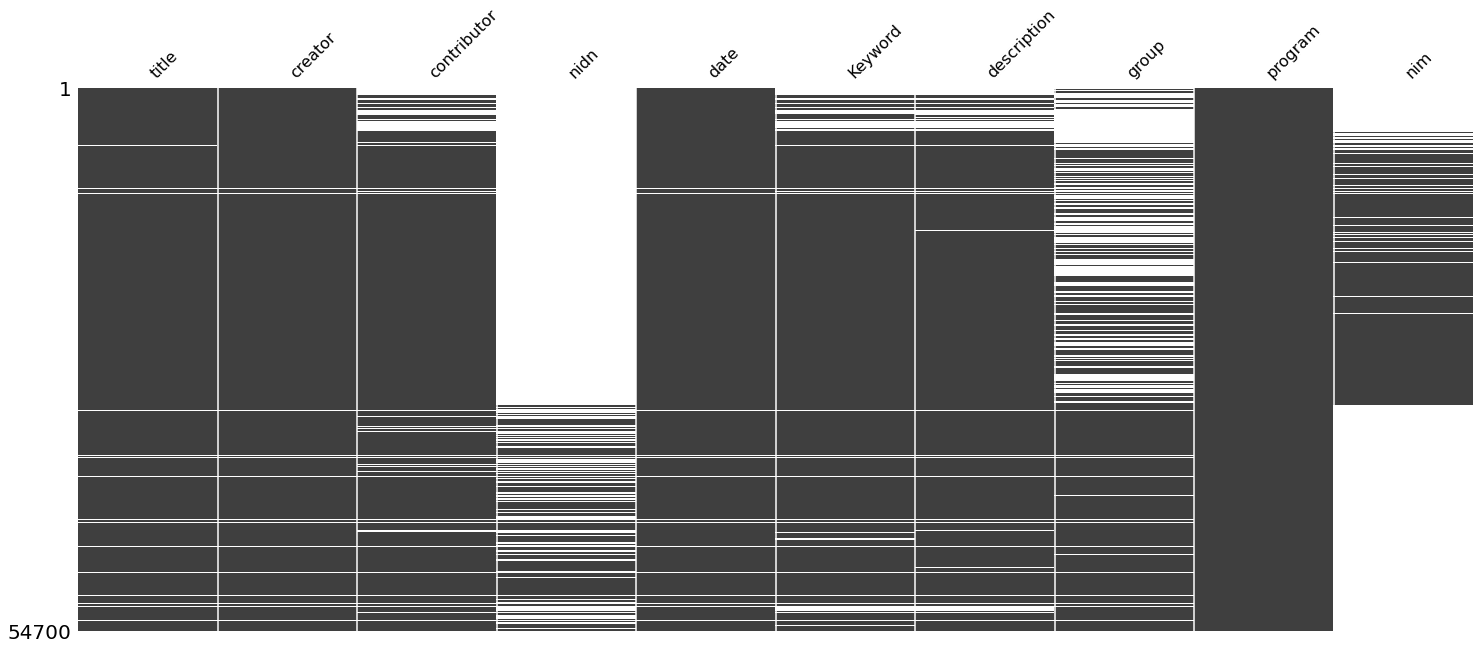

In [25]:
import missingno as msno

msno.matrix(katalog, sparkline=False);

Dari melihat sekilas, kita melihat bahwa data NIM tidak pernah diikutkan lagi (setidaknya pada kolom `creator`) sejak kolom `nidn` mulai aktif diisi. Selain itu, kita melihat kolom ini juga mengakibatkan peningkatan keterisian kolom `subjek`.

Dari grafik tersebut, kita melihat ada baris yang semua datanya kosong (ditandai oleh garis putih). Baris-baris ini berhubungan dengan dokumen yang ditarik dari katalog, atau akibat nomor *identifier* yang dokumen yang diubah (ingat bahwa nomor *identifier* nilainya selalu meningkat). Selanjutnya, ada baiknya baris-baris kosong ini tidak diikutkan dalam eksplorasi.

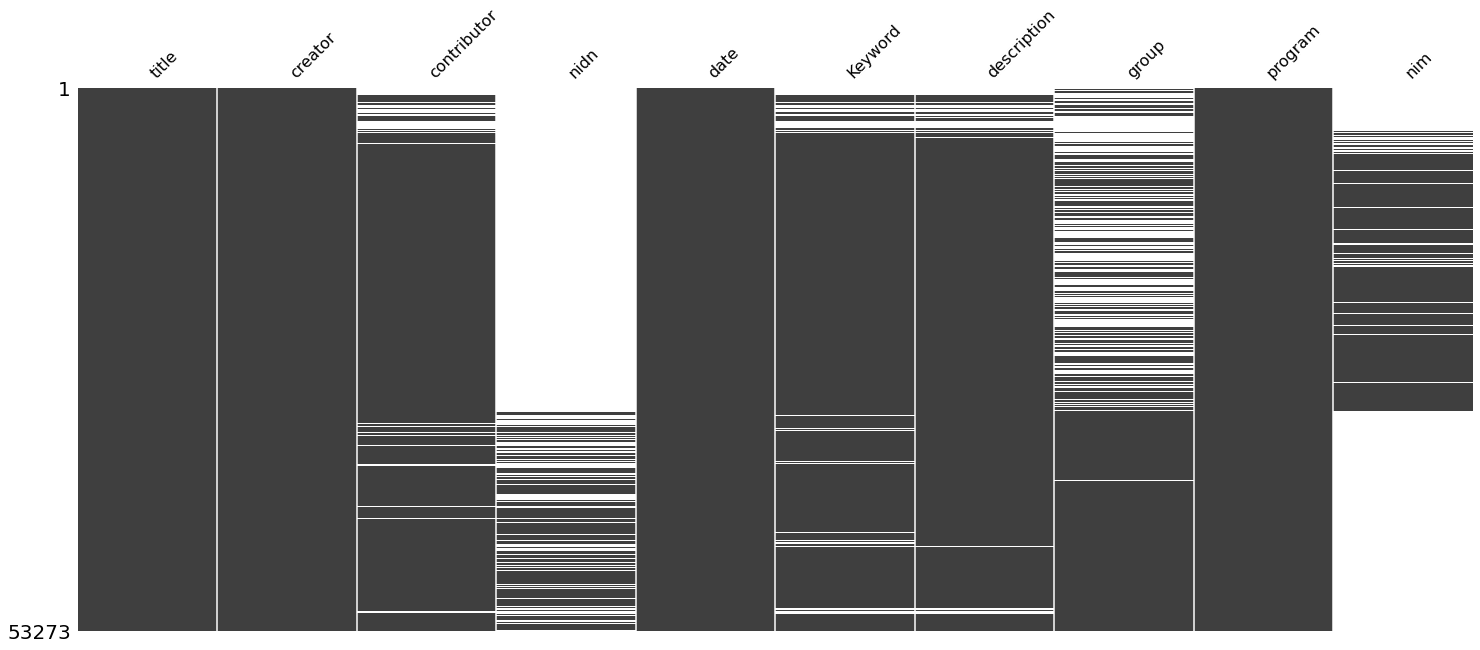

In [26]:
# kolom `title` yang kosong sebagai acuan nomor
# identifier dengan data yang telah dihapus
katalog = katalog[katalog['title'].notnull()]

msno.matrix(katalog, sparkline=False);

Mari kita lihat bagaimana pertumbuhan katalog, berdasarkan informasi dari kolom `date`

In [27]:
# ubah kolom menjadi datetime, lalu bentuk
# DataFrame baru
df = pd.DataFrame(pd.to_datetime(katalog['date']))
df['dummy'] = 1
df = df.set_index('date')

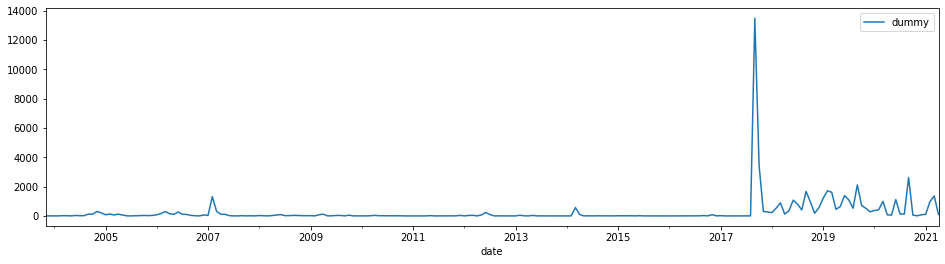

In [28]:
month_view = df.resample('M').sum()
month_view.plot(figsize=(16,4));

In [29]:
month_view.max()[0]

13499

Sepertinya ada bulan ketika 13.5K entri baru ditambahkan ke dalam katalog. Melihat lebih detail, kejadian ini terjadi pada suatu jam saat 14 Februari 2007

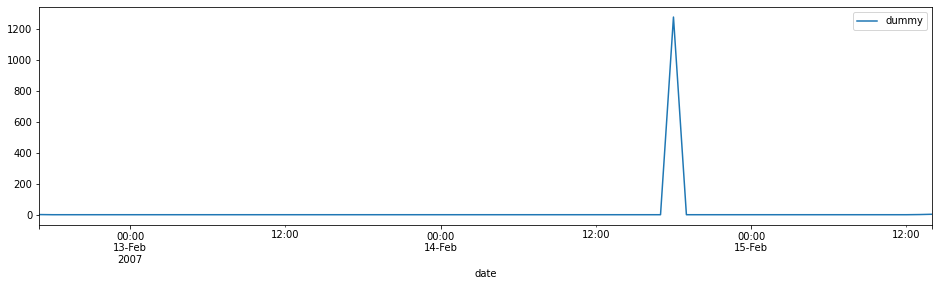

In [30]:
start = pd.to_datetime('2007-02-12 00:00:00')
end = pd.to_datetime('2007-02-16 00:00:00')
df_ = df[(start<=df.index) & (df.index<=end)]

# lihat penambahan per setiap jam pada bulan Februari
df_.resample('H').sum().plot(figsize=(16,4));

Berbeda dengan dugaan saya, *input* secara masal ini tidak berhubungan dengan kemunculan kolom `nidn`. 

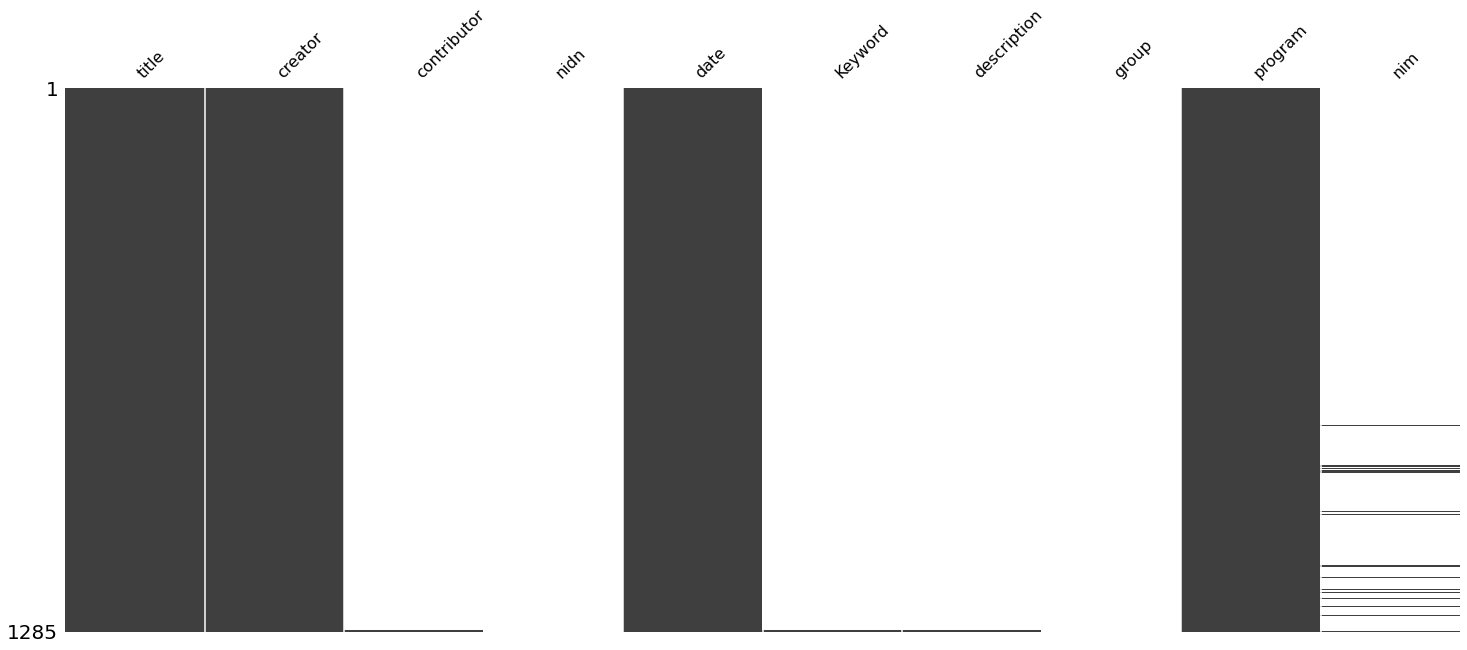

In [31]:
input_range = katalog[(start<=df.index) & (df.index<=end)]
msno.matrix(input_range, sparkline=False);

Hal lain yang membuat saya penasaran adalah ukuran teks pada kolom `description`: bagaimana pertumbuhan panjang teks `description` secara rata rata?

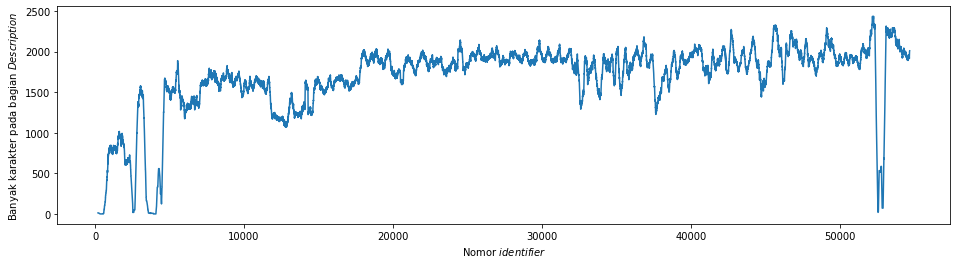

In [32]:
# panjang teks kolom description
size_desc = katalog['description'].fillna('').apply(len)

# hitung moving average
ma100 = size_desc.rolling(window=200).mean()

# plot
ax = ma100.plot(figsize=(16,4))
ax.set_xlabel("Nomor $\it{identifier}$")
ax.set_ylabel("Banyak karakter pada bagian $\it{Description}$");

Coba kita lihat kontribusi dokumen dari setiap program studi

In [33]:
group = katalog.groupby(['group'])

group.count().sort_values(by='title')['title']

# coba buat nested pie chart tentang persentase
# group dan program

group
UPT Perpustakaan      48
?                    183
SITH                1505
FSRD                1644
SF                  1711
FTTM                1895
FITB                2094
Lain-lain           2133
FTI                 2640
SAPPK               2743
FTMD                2781
STEI                3009
FTSL                3370
FMIPA               4590
SBM                 5976
Name: title, dtype: int64

## Eksperimen

Ada beberapa eksperimen yang dilakukan dengan data ini
* Kemiripan dua dokumen
* Pengelompokan dokumen
* Sistem rekomendasi (dosen, dokumen, ...)